In [189]:
import pandas as pd
import numpy as np
import json
# import psycopg2
# from sqlalchemy import create_engine
# import os
# from dotenv import load_dotenv
# load_dotenv()

# from script.database_pipeline import Pipeline
from script.helper import *

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [190]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Setting up DB

**Decided to put database on hold**

In [191]:
# username = os.getenv('PSQL_USER')
# password = os.getenv('PASS')
# host = os.getenv('HOST')
# port = os.getenv('PORT')

# db_url = (f"postgresql+psycopg2://{username}:{password}@{host}:{port}/data_prof")

In [192]:
# engine = create_engine(db_url)

In [193]:
# Converted into a csv
df = pd.read_csv('ds_2019.csv')

In [194]:
# pipe = Pipeline(engine)
# pipe.add_table(df, 'og')

### EDA

Exploring and cleaning

In [195]:
df.head()

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,HoursWorkedPerWeek,TelecommuteDaysPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2017,2017-01-05 05:10:20.451,200000,United States,Not Asked,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,...,45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
1,2017,2017-01-05 05:26:23.388,61515,United Kingdom,Not Asked,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,...,35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
2,2017,2017-01-05 05:32:57.367,95000,Germany,Not Asked,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,...,45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
3,2017,2017-01-05 05:33:03.316,56000,United Kingdom,Not Asked,Microsoft SQL Server,6,NaN,Full time employee,DBA,...,40,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
4,2017,2017-01-05 05:34:33.866,35000,France,Not Asked,Microsoft SQL Server,10,Oracle,Full time employee of a consulting/contracting...,DBA,...,40,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Survey Year                           6893 non-null   int64 
 1   Timestamp                             6893 non-null   object
 2   SalaryUSD                             6893 non-null   object
 3   Country                               6893 non-null   object
 4   PostalCode                            5934 non-null   object
 5   PrimaryDatabase                       6893 non-null   object
 6   YearsWithThisDatabase                 6893 non-null   int64 
 7   OtherDatabases                        5520 non-null   object
 8   EmploymentStatus                      6893 non-null   object
 9   JobTitle                              6893 non-null   object
 10  ManageStaff                           6893 non-null   object
 11  YearsWithThisTypeOfJob        

In [197]:
df.isna().mean()

Survey Year                             0.000000
Timestamp                               0.000000
SalaryUSD                               0.000000
Country                                 0.000000
PostalCode                              0.139127
PrimaryDatabase                         0.000000
YearsWithThisDatabase                   0.000000
OtherDatabases                          0.199188
EmploymentStatus                        0.000000
JobTitle                                0.000000
ManageStaff                             0.000000
YearsWithThisTypeOfJob                  0.000000
HowManyCompanies                        0.000000
OtherPeopleOnYourTeam                   0.000000
CompanyEmployeesOverall                 0.000000
DatabaseServers                         0.000000
Education                               0.000000
EducationIsComputerRelated              0.176411
Certifications                          0.000000
HoursWorkedPerWeek                      0.000000
TelecommuteDaysPerWe

In [393]:
df.shape

(6893, 29)

In [198]:
countries = df['Country'].value_counts()
countries.head()

United States     4509
United Kingdom     667
Canada             244
Australia          185
India              112
Name: Country, dtype: int64

### Looking at overall US to start with

since majority of the data is in US

In [199]:
us = df[df['Country'] == 'United States'].copy()

In [200]:
# Separate into three groups later, 2017, 2018, 2019
# us2017 = us[us['Survey Year'] == 2017]
# us2018 = us[us['Survey Year'] == 2018]
# us2019 = us[us['Survey Year'] == 2019]

In [201]:
us.isna().mean()

Survey Year                             0.000000
Timestamp                               0.000000
SalaryUSD                               0.000000
Country                                 0.000000
PostalCode                              0.066977
PrimaryDatabase                         0.000000
YearsWithThisDatabase                   0.000000
OtherDatabases                          0.193613
EmploymentStatus                        0.000000
JobTitle                                0.000000
ManageStaff                             0.000000
YearsWithThisTypeOfJob                  0.000000
HowManyCompanies                        0.000000
OtherPeopleOnYourTeam                   0.000000
CompanyEmployeesOverall                 0.000000
DatabaseServers                         0.000000
Education                               0.000000
EducationIsComputerRelated              0.157241
Certifications                          0.000000
HoursWorkedPerWeek                      0.000000
TelecommuteDaysPerWe

In [202]:
(us == 'Not Asked').mean(axis=0)

/usr/local/anaconda3/envs/cap1/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Survey Year                             0.000000
Timestamp                               0.000000
SalaryUSD                               0.000000
Country                                 0.000000
PostalCode                              0.416722
PrimaryDatabase                         0.000000
YearsWithThisDatabase                   0.000000
OtherDatabases                          0.000000
EmploymentStatus                        0.000000
JobTitle                                0.000000
ManageStaff                             0.000000
YearsWithThisTypeOfJob                  0.000000
HowManyCompanies                        0.866489
OtherPeopleOnYourTeam                   0.000000
CompanyEmployeesOverall                 0.866489
DatabaseServers                         0.000000
Education                               0.000000
EducationIsComputerRelated              0.000000
Certifications                          0.000000
HoursWorkedPerWeek                      0.000000
TelecommuteDaysPerWe

In [203]:
us[us['CareerPlansThisYear'] == 'Not Asked']['Survey Year'].value_counts()

2017    1879
Name: Survey Year, dtype: int64

In [390]:
features = ['SalaryUSD', 'PostalCode', 'YearsWithThisDatabase', 'PrimaryDatabase', 'OtherDatabases','ManageStaff', 'YearsWithThisTypeOfJob', 'OtherPeopleOnYourTeam', \
            'DatabaseServers', 'Education', 'HoursWorkedPerWeek', 'TelecommuteDaysPerWeek', 'EmploymentSector', \
            'Gender', 'OtherJobDuties']
target = ['LookingForAnotherJob']

### Salary

In [205]:
us_cleaned = us.copy()

In [206]:
us_cleaned.loc[:, 'SalaryUSD'] = us['SalaryUSD'].apply(str).replace(',|\s+', '', regex=True).astype(float)

In [207]:
us_cleaned['SalaryUSD'].describe()

count    4.509000e+03
mean     1.075171e+05
std      5.717729e+04
min      9.227000e+01
25%      8.500000e+04
50%      1.020000e+05
75%      1.220000e+05
max      1.450000e+06
Name: SalaryUSD, dtype: float64

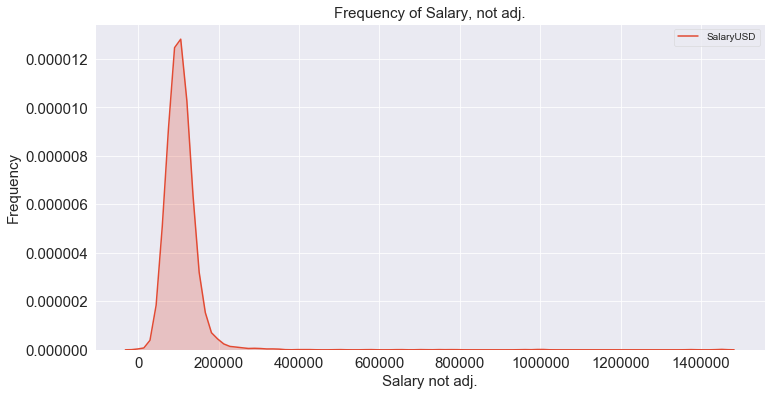

In [208]:
fig, ax = plt.subplots(figsize=(12, 6))
(plot_quant(ax, us_cleaned['SalaryUSD'], xlabel='Salary not adj.', ylabel='Frequency',
                 title='Frequency of Salary, not adj.', shade=True))

### Remove salary outliers

In [209]:
salary = us_cleaned['SalaryUSD']

In [210]:
salary.describe()

count    4.509000e+03
mean     1.075171e+05
std      5.717729e+04
min      9.227000e+01
25%      8.500000e+04
50%      1.020000e+05
75%      1.220000e+05
max      1.450000e+06
Name: SalaryUSD, dtype: float64

In [211]:
salary_q3 = salary.quantile(.75)
salary_q1 = salary.quantile(.25)

salary_iqr = salary_q3 - salary_q1
salary_adj = salary[(salary < (salary_q3 + 1.5 * salary_iqr)) & (salary > (salary_q1 - 1.5 * salary_iqr))]

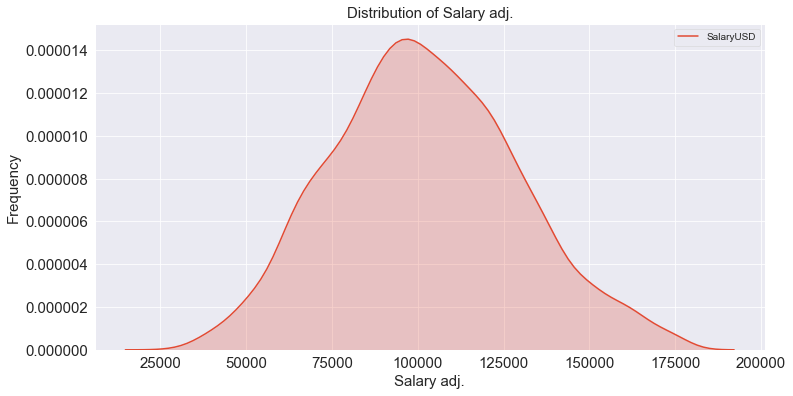

In [212]:
fig, ax = plt.subplots(figsize=(12, 6))
(plot_quant(ax, salary_adj, xlabel='Salary adj.', ylabel='Frequency',
                 title='Distribution of Salary adj.', shade=True))

In [331]:
third = (salary < (salary_q3 + 1.5 * salary_iqr))
first = (salary > (salary_q1 - 1.5 * salary_iqr))

salary2017 = us_cleaned[(third) & (first) & (us_cleaned['Survey Year'] == 2017)]['SalaryUSD']
salary2018 = us_cleaned[(third) & (first) & (us_cleaned['Survey Year'] == 2018)]['SalaryUSD']
salary2019 = us_cleaned[(third) & (first) & (us_cleaned['Survey Year'] == 2019)]['SalaryUSD']

In [340]:
round(salary2017.mean(), 2)

102064.81

In [341]:
round(salary2018.mean(), 2)

102303.78

In [342]:
round(salary2019.mean(), 2)

102696.8

### Job Title

In [347]:
def transform_job(row):
    if 'DBA' in row:
        return 'DBA'
    elif 'Developer' in row:
        return 'Developer'
    return row

In [349]:
us_cleaned['JobTitle'].apply(transform_job).value_counts()

DBA                            2272
Developer                      1007
Architect                       379
Manager                         300
Analyst                         247
Engineer                        209
Other                            65
Data Scientist                   22
Systems Administrator             2
Database Specialist               1
Principal database engineer       1
Consultant                        1
Sr Consultant                     1
Technician                        1
Analytics consultant              1
Name: JobTitle, dtype: int64

### Postal Code

In [213]:
us_cleaned['PostalCode']

0       Not Asked
12      Not Asked
14      Not Asked
15      Not Asked
17      Not Asked
          ...    
6883        44122
6884        29201
6886        03873
6887        50266
6891        49506
Name: PostalCode, Length: 4509, dtype: object

In [214]:
us_cleaned['PostalCode'].isna().sum()

302

In [215]:
(us_cleaned['PostalCode'] != 'Not Asked').sum()

2630

### Primary Database

In [373]:
us_cleaned['PrimaryDatabase'].value_counts()

Microsoft SQL Server       4230
Oracle                      140
PostgreSQL                   30
Other                        26
Azure SQL DB                 15
MySQL/MariaDB                15
DB2                          11
Amazon RDS (any flavor)      10
Microsoft Access             10
Teradata                      9
SAP                           7
Cassandra                     2
MongoDB                       2
SQLite                        1
Elasticsearch                 1
Name: PrimaryDatabase, dtype: int64

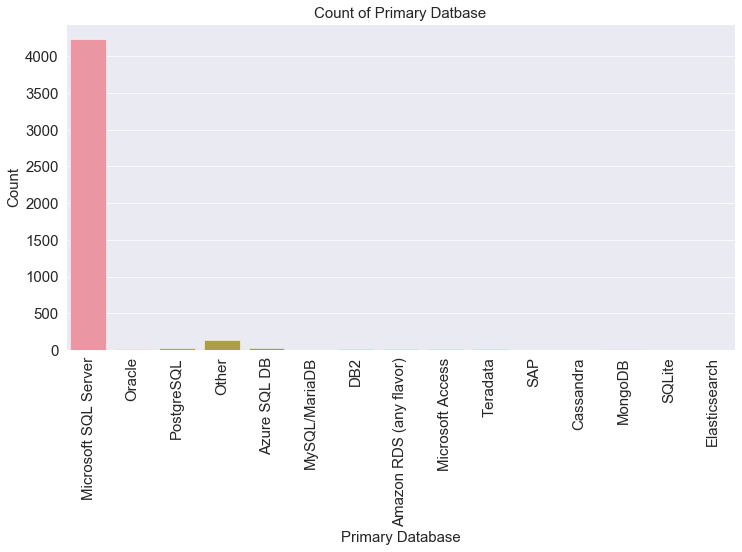

In [374]:
fig, ax = plt.subplots(figsize=(12, 6))
(plot_cat(ax, 'PrimaryDatabase', us_cleaned, xlabel='Primary Database', ylabel='Count', 
              title='Count of Primary Datbase'))

_ = ax.set_xticklabels(us_cleaned['PrimaryDatabase'].value_counts().index, rotation=90)

### Other Databases

In [375]:
us_cleaned['OtherDatabases'].value_counts()

Microsoft SQL Server                                                                                               360
Microsoft Access                                                                                                   188
Oracle                                                                                                             167
Azure SQL DB                                                                                                       119
Microsoft SQL Server, Microsoft Access                                                                             105
                                                                                                                  ... 
Oracle, MySQL/MariaDB, PostgreSQL, Microsoft Access, SQLite, Neo4j                                                   1
Microsoft SQL Server, MySQL/MariaDB, PostgreSQL, Azure SQL DB, Amazon RDS (any flavor), Azure SQL Datawarehouse      1
PostgreSQL, MongoDB, Cassandra, Redis, Elasticse

In [377]:
us_cleaned['od_count'] = us_cleaned['OtherDatabases'].str.split(',').str.len()

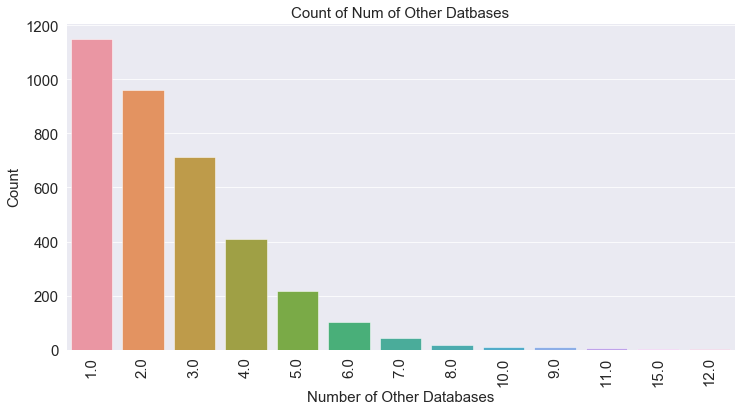

In [378]:
fig, ax = plt.subplots(figsize=(12, 6))
(plot_cat(ax, 'od_count', us_cleaned, xlabel='Number of Other Databases', ylabel='Count', 
              title='Count of Num of Other Datbases'))

_ = ax.set_xticklabels(us_cleaned['od_count'].value_counts().index, rotation=90)

### Years with this database

In [216]:
us['YearsWithThisDatabase'].value_counts().sort_index()

0          6
1        109
2        163
3        231
4        241
5        304
6        216
7        222
8        226
9         99
10       486
11       100
12       219
13       111
14        88
15       432
16       155
17       232
18       221
19        58
20       369
21        43
22        42
23        29
24        13
25        61
26         5
27         4
28         6
29         1
30         9
32         2
38         1
2000       1
2004       1
2011       1
30331      1
53716      1
Name: YearsWithThisDatabase, dtype: int64

In [217]:
us_cleaned.loc[:, 'YearsWithThisDatabase'] = us.loc[us['YearsWithThisDatabase'] < 100, 'YearsWithThisDatabase']

In [218]:
year_db = us_cleaned['YearsWithThisDatabase']

In [219]:
yeardb_q3 = year_db.describe()['75%']
yeardb_q1 = year_db.describe()['25%']

yeardb_iqr = yeardb_q3 - yeardb_q1
yeardb_adj = year_db[(year_db < (yeardb_q3 + 1.5 * yeardb_iqr)) & (year_db > (yeardb_q1 - 1.5 * yeardb_iqr))]

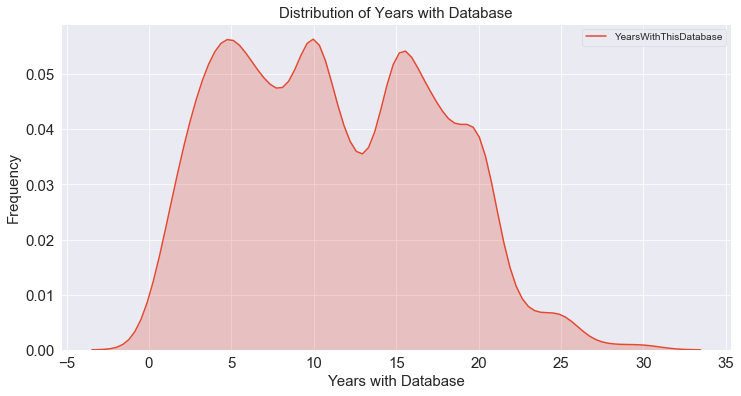

In [220]:
fig, ax = plt.subplots(figsize=(12, 6))
(plot_quant(ax, yeardb_adj, xlabel='Years with Database', ylabel='Frequency',
                 title='Distribution of Years with Database', shade=True))

### EmploymentStatus

In [355]:
def transform_empstatus(row):
    if 'Full time employee' in row:
        return 'Full time employee'
    elif 'Independent' in row:
        return 'Independent'
    return 'Part time'

In [358]:
us_cleaned.loc[:, 'EmploymentStatus'] = us['EmploymentStatus'].apply(transform_empstatus)

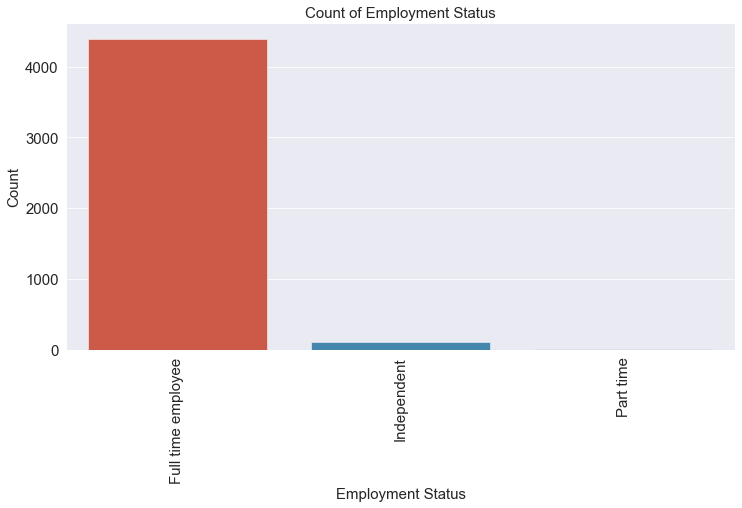

In [367]:
fig, ax = plt.subplots(figsize=(12, 6))
(plot_cat(ax, 'EmploymentStatus', us_cleaned, xlabel='Employment Status', ylabel='Count', 
              title='Count of Employment Status'))

_ = ax.set_xticklabels(us_cleaned['EmploymentStatus'].value_counts().index, rotation=90)

### JobTitle

In [347]:
def transform_job(row):
    if 'DBA' in row:
        return 'DBA'
    elif 'Developer' in row:
        return 'Developer'
    return row

In [363]:
us_cleaned.loc[:, 'JobTitle'] = us_cleaned['JobTitle'].apply(transform_job)

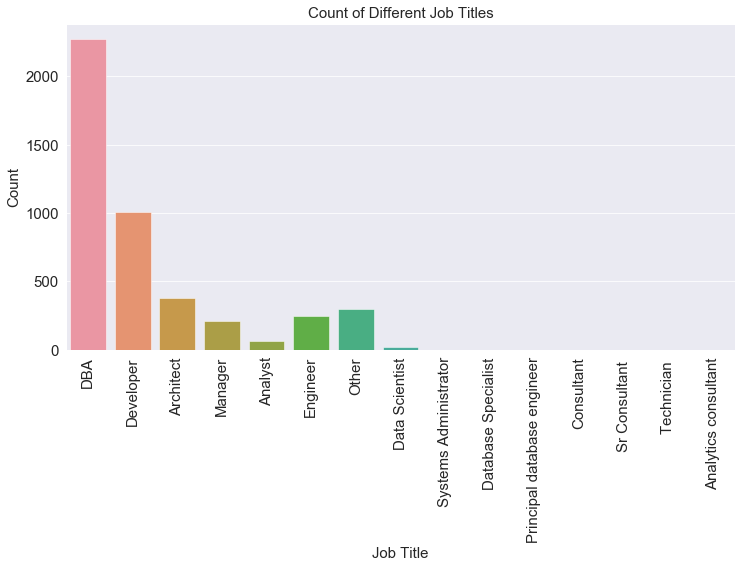

In [366]:
fig, ax = plt.subplots(figsize=(12, 6))
(plot_cat(ax, 'JobTitle', us_cleaned, xlabel='Job Title', ylabel='Count', 
              title='Count of Different Job Titles'))

_ = ax.set_xticklabels(us_cleaned['JobTitle'].value_counts().index, rotation=90)

### Manage Staff

In [221]:
us_cleaned['ManageStaff'].value_counts()

No     3498
Yes    1011
Name: ManageStaff, dtype: int64

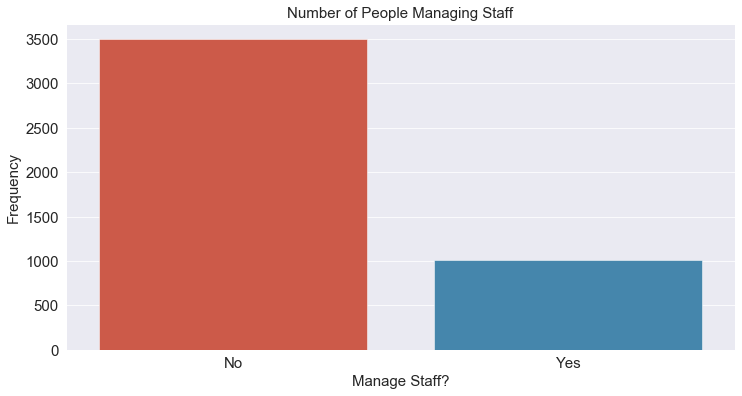

In [222]:
fig, ax = plt.subplots(figsize=(12, 6))
(plot_cat(ax, 'ManageStaff', us, xlabel='Manage Staff?', ylabel='Frequency', 
              title='Number of People Managing Staff'))

### Years With This Type of Job

In [223]:
us_cleaned['YearsWithThisTypeOfJob'].value_counts().sort_index()

0      38
1     531
2     520
3     499
4     397
5     448
6     257
7     212
8     184
9      80
10    326
11     59
12    119
13     51
14     37
15    186
16     52
17     69
18     72
19     26
20    150
21     20
22     30
23     14
24      9
25     49
26      7
27      6
28     10
29      8
30     18
31      2
32      6
33      2
34      2
35      4
36      2
37      1
38      3
39      1
40      2
Name: YearsWithThisTypeOfJob, dtype: int64

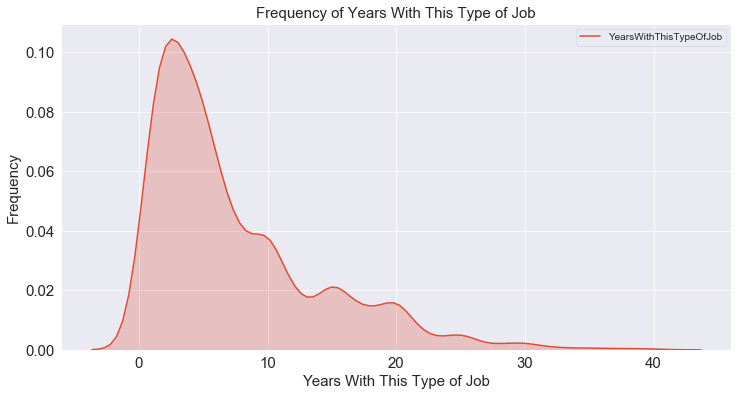

In [224]:
fig, ax = plt.subplots(figsize=(12, 6))
(plot_quant(ax, us_cleaned['YearsWithThisTypeOfJob'], xlabel='Years With This Type of Job', ylabel='Frequency',
                        title='Frequency of Years With This Type of Job', shade=True))

### Amount of Others on Your Team

Label Encode ordinality

In [225]:
us_cleaned['OtherPeopleOnYourTeam'].value_counts()

None           1842
1               942
2               521
More than 5     422
3               378
4               239
5               165
Name: OtherPeopleOnYourTeam, dtype: int64

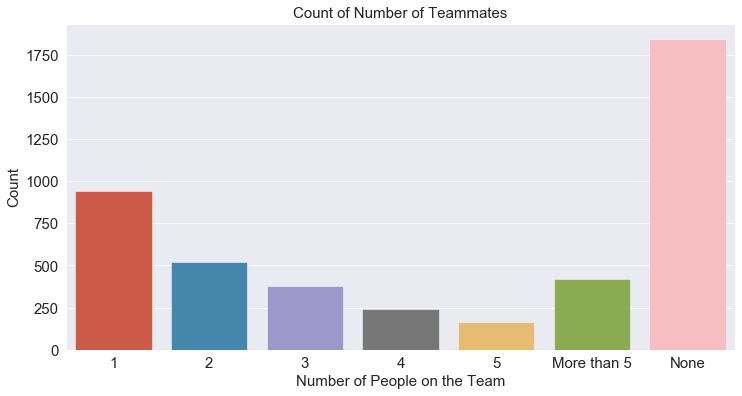

In [394]:
fig, ax = plt.subplots(figsize=(12, 6))

(plot_cat(ax, 'OtherPeopleOnYourTeam', us_cleaned, xlabel='Number of People on the Team', ylabel='Count',
        title='Count of Number of Teammates', order=us['OtherPeopleOnYourTeam'].value_counts().sort_index().index))



### Education Level

Label Encode ordinality

In [227]:
us_cleaned['Education'].value_counts()

Bachelors (4 years)           2548
Masters                        762
None (no degree completed)     672
Associates (2 years)           503
Doctorate/PhD                   24
Name: Education, dtype: int64

In [228]:
us_cleaned.loc[:, 'Education'] = us['Education'].str.replace('\\(.*\\)', '', regex=True).str.strip()

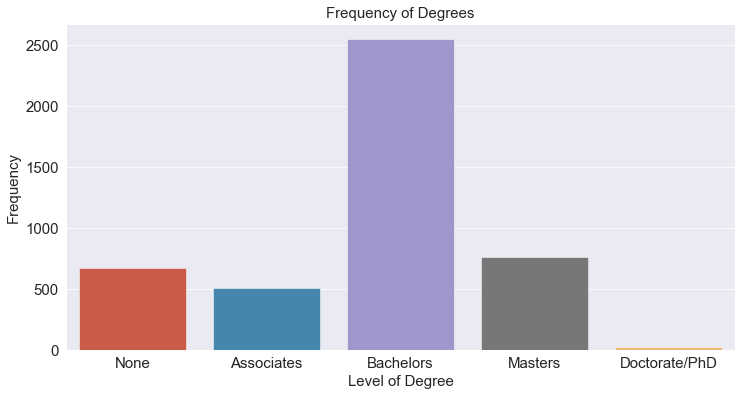

In [229]:
fig, ax = plt.subplots(figsize=(12, 6))
(plot_cat(ax, 'Education', us_cleaned, xlabel='Level of Degree', ylabel='Frequency', 
         title='Frequency of Degrees', order=['None', 'Associates', 'Bachelors', 'Masters', 'Doctorate/PhD'])
)

### Hours Worked Per Week

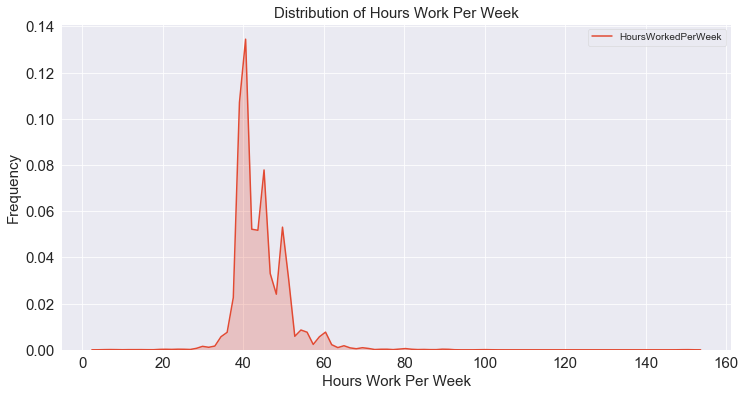

In [395]:
fig, ax = plt.subplots(figsize=(12, 6))
(plot_quant(ax, us_cleaned['HoursWorkedPerWeek'], xlabel='Hours Work Per Week', ylabel='Frequency',
                 title='Distribution of Hours Work Per Week', shade=True))

### Telecommute Days Per Week

Label Encode ordinality

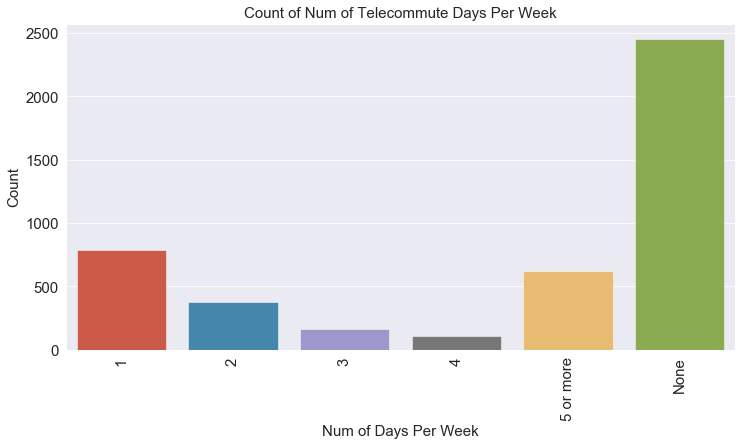

In [396]:
fig, ax = plt.subplots(figsize=(12, 6))
(plot_cat(ax, 'TelecommuteDaysPerWeek', us_cleaned, xlabel='Num of Days Per Week', ylabel='Count',
             title='Count of Num of Telecommute Days Per Week', 
             order=us_cleaned['TelecommuteDaysPerWeek'].value_counts().sort_index().index))

_ = ax.set_xticklabels(['1', '2', '3', '4', '5 or more', 'None'], rotation=90)



### Employment Sector

Maybe OHE

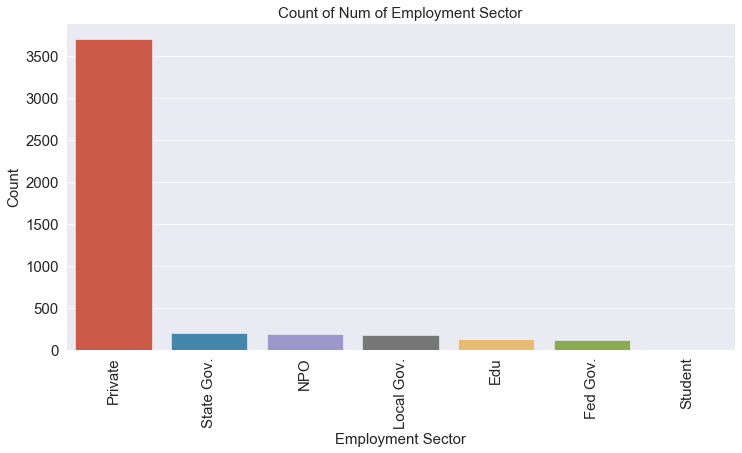

In [400]:
fig, ax = plt.subplots(figsize=(12, 6))
(plot_cat(ax, 'EmploymentSector', us_cleaned, xlabel='Employment Sector', ylabel='Count',
         title='Count of Num of Employment Sector', order=us_cleaned['EmploymentSector'].value_counts().index))

_ = ax.set_xticklabels(['Private', 'State Gov.', 'NPO', 'Local Gov.', 'Edu', 'Fed Gov.', 'Student'], rotation=90)

### Gender

Might have to drop gender due to high number of third category/random answers/Not Asked.

In [233]:
def clean_gender(row):
    if (row not in ['Male', 'Female', 'Not Asked']):
        return 'Other'
    return row

In [234]:
us_cleaned.loc[:, 'Gender'] = us['Gender'].apply(clean_gender)

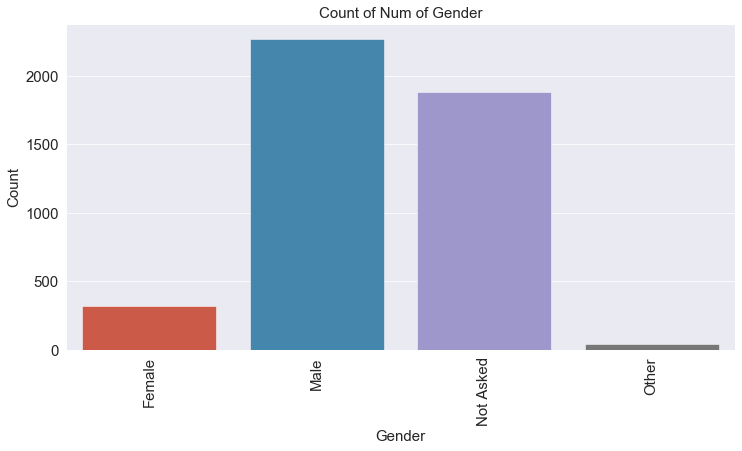

In [235]:
fig, ax = plt.subplots(figsize=(12, 6))
(plot_cat(ax, 'Gender', us_cleaned, xlabel='Gender', ylabel='Count',
         title='Count of Num of Gender', order=us_cleaned['Gender'].value_counts().sort_index().index))

_ = ax.set_xticklabels(us_cleaned['Gender'].value_counts().sort_index().index, rotation=90)

### Amount of Other Job Duties

Might have to exclude, due to high number of nans/No answers

In [236]:
us['OtherJobDuties'].replace('Not Asked', np.nan).isna().mean()

0.5021068973164782

In [380]:
def transform_ojd(row):
    if (row == 'Not Asked'):
        return ['N/A']
    return row.split(',')

def count_ojd(row):
    if ('N/A' in row):
        return np.nan
    elif ('None' in row):
        return 0
    return len(row)

In [381]:
us_cleaned['ojd_count'] = (us['OtherJobDuties'].replace(np.nan, 'None')
                                               .str.strip()
                                               .replace('\\(.*\\)', '', regex=True)
                                               .apply(transform_ojd)
                                               .apply(count_ojd))

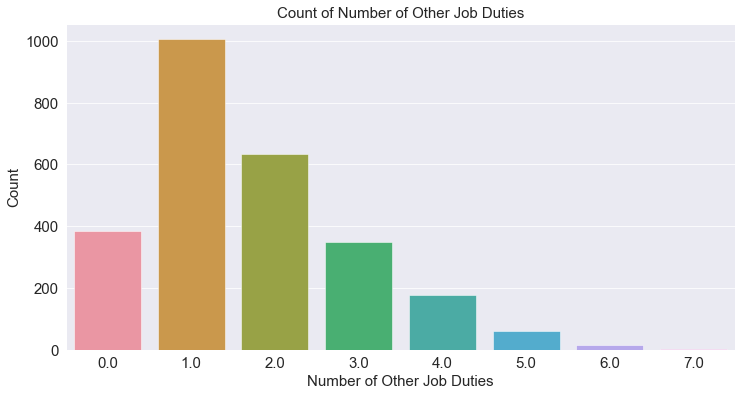

In [382]:
fig, ax = plt.subplots(figsize=(12, 6))
(plot_cat(ax, 'ojd_count', us_cleaned, xlabel='Number of Other Job Duties', ylabel='Count', 
                        title='Count of Number of Other Job Duties'))

In [391]:
features += ['od_count', 'ojd_count']

In [392]:
features

['SalaryUSD',
 'PostalCode',
 'YearsWithThisDatabase',
 'PrimaryDatabase',
 'OtherDatabases',
 'ManageStaff',
 'YearsWithThisTypeOfJob',
 'OtherPeopleOnYourTeam',
 'DatabaseServers',
 'Education',
 'HoursWorkedPerWeek',
 'TelecommuteDaysPerWeek',
 'EmploymentSector',
 'Gender',
 'OtherJobDuties',
 'od_count',
 'ojd_count']

### Feature Engineering

In [242]:
X = us_cleaned.loc[:, features + target]

In [243]:
X.head()

,SalaryUSD,YearsWithThisDatabase,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,DatabaseServers,Education,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Gender,OtherJobDuties,PostalCode,OJD_count,LookingForAnotherJob
0,200000.0,10.0,No,5,2,350,Masters,45,1,Private business,Not Asked,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)"
12,137500.0,16.0,No,6,4,200,None,55,5 or more,Private business,Not Asked,Not Asked,Not Asked,NaN,No
14,85000.0,8.0,No,2,None,15,Bachelors,50,"None, or less than 1 day per week",Private business,Not Asked,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)"
15,96000.0,5.0,No,5,None,100,Masters,45,1,Private business,Not Asked,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)"
17,66000.0,10.0,No,10,None,4,Associates,60,5 or more,Private business,Not Asked,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)"


### SalaryUSD

Cleaning erroneous values

In [244]:
X = X.drop(X[X['SalaryUSD'] < 100].index)

In [245]:
X.head()

,SalaryUSD,YearsWithThisDatabase,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,DatabaseServers,Education,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Gender,OtherJobDuties,PostalCode,OJD_count,LookingForAnotherJob
0,200000.0,10.0,No,5,2,350,Masters,45,1,Private business,Not Asked,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)"
12,137500.0,16.0,No,6,4,200,None,55,5 or more,Private business,Not Asked,Not Asked,Not Asked,NaN,No
14,85000.0,8.0,No,2,None,15,Bachelors,50,"None, or less than 1 day per week",Private business,Not Asked,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)"
15,96000.0,5.0,No,5,None,100,Masters,45,1,Private business,Not Asked,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)"
17,66000.0,10.0,No,10,None,4,Associates,60,5 or more,Private business,Not Asked,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)"


### PostalCode

In [246]:
with open('postcodeclean.json', 'r') as f:
    results_combined = json.load(f)

In [247]:
def transform_zipcode(row):
    if row in results_combined:
        return results_combined[row]
    return row

In [248]:
X.loc[:, 'PostalCodeStates'] = X['PostalCode'].apply(transform_zipcode)

In [249]:
X = X.drop('PostalCode', axis=1)

In [250]:
X.head()

,SalaryUSD,YearsWithThisDatabase,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,DatabaseServers,Education,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Gender,OtherJobDuties,OJD_count,LookingForAnotherJob,PostalCodeStates
0,200000.0,10.0,No,5,2,350,Masters,45,1,Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
12,137500.0,16.0,No,6,4,200,None,55,5 or more,Private business,Not Asked,Not Asked,NaN,No,Not Asked
14,85000.0,8.0,No,2,None,15,Bachelors,50,"None, or less than 1 day per week",Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
15,96000.0,5.0,No,5,None,100,Masters,45,1,Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
17,66000.0,10.0,No,10,None,4,Associates,60,5 or more,Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked


### ManageStaff

Change it into a categorical variable

In [251]:
ms = X['ManageStaff'].value_counts().index

In [252]:
ms_map = {v: i for i, v in enumerate(ms)}

In [253]:
X.loc[:, 'ManageStaff'] = X['ManageStaff'].map(ms_map)

In [254]:
X.head()

,SalaryUSD,YearsWithThisDatabase,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,DatabaseServers,Education,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Gender,OtherJobDuties,OJD_count,LookingForAnotherJob,PostalCodeStates
0,200000.0,10.0,0,5,2,350,Masters,45,1,Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
12,137500.0,16.0,0,6,4,200,None,55,5 or more,Private business,Not Asked,Not Asked,NaN,No,Not Asked
14,85000.0,8.0,0,2,None,15,Bachelors,50,"None, or less than 1 day per week",Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
15,96000.0,5.0,0,5,None,100,Masters,45,1,Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
17,66000.0,10.0,0,10,None,4,Associates,60,5 or more,Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked


### OtherPeopleOnYourTeam

In [255]:
others_map = {'None': 0, 
              '1': 1, 
              '2': 2,
              '3': 3,
              '4': 4,
              '5': 5,
             'More than 5': 6}

In [256]:
X.loc[:, 'OtherPeopleOnYourTeam'] = X['OtherPeopleOnYourTeam'].map(others_map)

In [257]:
X.head()

,SalaryUSD,YearsWithThisDatabase,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,DatabaseServers,Education,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Gender,OtherJobDuties,OJD_count,LookingForAnotherJob,PostalCodeStates
0,200000.0,10.0,0,5,2,350,Masters,45,1,Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
12,137500.0,16.0,0,6,4,200,None,55,5 or more,Private business,Not Asked,Not Asked,NaN,No,Not Asked
14,85000.0,8.0,0,2,0,15,Bachelors,50,"None, or less than 1 day per week",Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
15,96000.0,5.0,0,5,0,100,Masters,45,1,Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
17,66000.0,10.0,0,10,0,4,Associates,60,5 or more,Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked


### Education

In [258]:
edu_map = {
    'None': 0,
    'Associates': 1,
    'Bachelors': 2,
    'Masters': 3,
    'Doctorate/PhD': 4
}

In [259]:
X.loc[:, 'Education'] = X['Education'].map(edu_map)

In [260]:
X.head()

,SalaryUSD,YearsWithThisDatabase,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,DatabaseServers,Education,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Gender,OtherJobDuties,OJD_count,LookingForAnotherJob,PostalCodeStates
0,200000.0,10.0,0,5,2,350,3,45,1,Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
12,137500.0,16.0,0,6,4,200,0,55,5 or more,Private business,Not Asked,Not Asked,NaN,No,Not Asked
14,85000.0,8.0,0,2,0,15,2,50,"None, or less than 1 day per week",Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
15,96000.0,5.0,0,5,0,100,3,45,1,Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
17,66000.0,10.0,0,10,0,4,1,60,5 or more,Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked


### TelecommuteDaysPerWeek

In [261]:
tele_map = {
    'None, or less than 1 day per week': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5 or more': 5
}

In [262]:
X.loc[:, 'TelecommuteDaysPerWeek'] = X['TelecommuteDaysPerWeek'].map(tele_map)

In [263]:
X.head()

,SalaryUSD,YearsWithThisDatabase,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,DatabaseServers,Education,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Gender,OtherJobDuties,OJD_count,LookingForAnotherJob,PostalCodeStates
0,200000.0,10.0,0,5,2,350,3,45,1,Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
12,137500.0,16.0,0,6,4,200,0,55,5,Private business,Not Asked,Not Asked,NaN,No,Not Asked
14,85000.0,8.0,0,2,0,15,2,50,0,Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
15,96000.0,5.0,0,5,0,100,3,45,1,Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
17,66000.0,10.0,0,10,0,4,1,60,5,Private business,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked


### EmploymentSector

In [264]:
# Get dummies later

# X = pd.concat([X, pd.get_dummies(X['EmploymentSector'])], axis=1)
# X = X.drop('EmploymentSector', axis=1)

In [265]:
sectors = X['EmploymentSector'].value_counts().index

In [266]:
sector_map = {v: i for i, v in enumerate(sectors)}

In [267]:
X.loc[:, 'EmploymentSector'] = X['EmploymentSector'].map(sector_map)

In [268]:
X.head()

,SalaryUSD,YearsWithThisDatabase,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,DatabaseServers,Education,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Gender,OtherJobDuties,OJD_count,LookingForAnotherJob,PostalCodeStates
0,200000.0,10.0,0,5,2,350,3,45,1,0,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
12,137500.0,16.0,0,6,4,200,0,55,5,0,Not Asked,Not Asked,NaN,No,Not Asked
14,85000.0,8.0,0,2,0,15,2,50,0,0,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
15,96000.0,5.0,0,5,0,100,3,45,1,0,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked
17,66000.0,10.0,0,10,0,4,1,60,5,0,Not Asked,Not Asked,NaN,"Yes, but only passively (just curious)",Not Asked


### Gender

In [269]:
gender_map = {
    'Female': 0,
    'Male': 1,
    'Other': 3,
    'Not Asked': np.nan
}

In [270]:
X.loc[:, 'Gender'] = X['Gender'].map(gender_map)

### Other Job Duties

In [271]:
# Created OJD count up there while trying to visualize it

In [272]:
X = X.drop('OtherJobDuties', axis=1)

In [273]:
X.head()

,SalaryUSD,YearsWithThisDatabase,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,DatabaseServers,Education,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Gender,OJD_count,LookingForAnotherJob,PostalCodeStates
0,200000.0,10.0,0,5,2,350,3,45,1,0,NaN,NaN,"Yes, but only passively (just curious)",Not Asked
12,137500.0,16.0,0,6,4,200,0,55,5,0,NaN,NaN,No,Not Asked
14,85000.0,8.0,0,2,0,15,2,50,0,0,NaN,NaN,"Yes, but only passively (just curious)",Not Asked
15,96000.0,5.0,0,5,0,100,3,45,1,0,NaN,NaN,"Yes, but only passively (just curious)",Not Asked
17,66000.0,10.0,0,10,0,4,1,60,5,0,NaN,NaN,"Yes, but only passively (just curious)",Not Asked


### LookingForAnotherJob

In [274]:
looking = X['LookingForAnotherJob'].value_counts().index

In [275]:
looking_map = { v: i for i, v in enumerate(looking)}

In [276]:
X.loc[:, 'LookingForAnotherJob'] = X['LookingForAnotherJob'].map(looking_map)

In [277]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4508 entries, 0 to 6891
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SalaryUSD               4508 non-null   float64
 1   YearsWithThisDatabase   4503 non-null   float64
 2   ManageStaff             4508 non-null   int64  
 3   YearsWithThisTypeOfJob  4508 non-null   int64  
 4   OtherPeopleOnYourTeam   4508 non-null   int64  
 5   DatabaseServers         4508 non-null   int64  
 6   Education               4508 non-null   int64  
 7   HoursWorkedPerWeek      4508 non-null   int64  
 8   TelecommuteDaysPerWeek  4508 non-null   int64  
 9   EmploymentSector        4508 non-null   int64  
 10  Gender                  2629 non-null   float64
 11  OJD_count               2629 non-null   float64
 12  LookingForAnotherJob    4508 non-null   int64  
 13  PostalCodeStates        4206 non-null   object 
dtypes: float64(4), int64(9), object(1)
memor

In [278]:
X.head()

,SalaryUSD,YearsWithThisDatabase,ManageStaff,YearsWithThisTypeOfJob,OtherPeopleOnYourTeam,DatabaseServers,Education,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,Gender,OJD_count,LookingForAnotherJob,PostalCodeStates
0,200000.0,10.0,0,5,2,350,3,45,1,0,NaN,NaN,1,Not Asked
12,137500.0,16.0,0,6,4,200,0,55,5,0,NaN,NaN,0,Not Asked
14,85000.0,8.0,0,2,0,15,2,50,0,0,NaN,NaN,1,Not Asked
15,96000.0,5.0,0,5,0,100,3,45,1,0,NaN,NaN,1,Not Asked
17,66000.0,10.0,0,10,0,4,1,60,5,0,NaN,NaN,1,Not Asked


### Future plans

In [ ]:
# countries_more_than_ten = countries.index[countries > 10]
# df = df[df['Country'].isin(countries_more_than_ten)]
# df.head()

### Predictive pipelines